# Welcome! 

Abstract: "Student recruitment efforts require substantial institutional expenditures (e.g., hiring of staff,
travel funding, and marketing costs). In contrast, retention initiatives designed to manage student
enrollment are estimated to be 3-5 times more cost-effective than recruitment efforts, i.e., it takes
3-5 times as much money to recruit a new student than it does to retain an already enrolled
student (Noel, Levitz, & Saluri, 1985; Rosenberg & Czepiel, 1983; Tinto, 1975). Bean and
Hossler (1990) report that a student who is retained at an institution for four years will generate
the same income as four new students who leave after one year. One Canadian university factored in its average cost to recruiting a new student, and calculated that it loses \\$4,230 for each recruited student that is not retained to the second year (Okanagan University College, cited in Grayson & Grayson, 2003). At the University of St. Louis, each 1\%
increase in first-year retention rate was found to generate approximately \$500,000 in revenue by
the time these first-year students eventually graduate (Nicholl & Sutton, in Grayson & Grasyon,
2003)."(Joe Cuseao,MarymountCollege). This Notebook is a costs/benefit analysis of a retention program initiative which has an administrative cost of 3,400 dollars per student.Currently the estimated loss for a freshman that does not persist into his/her second year has a loss of 54,000 dollars in gross revenue.  Currently if the University predicted no student would churn i.e. no initiative our cost per student would be : \\$3082 per student. With a metric of performance that adheres to the business function keeping cost down. A trained random forest machine learning model with several [variables](#data) about students. We reduce our cost per student from 3082 to 3065 for a percent change of 55%.

Table Of Contents
1. [Frame the problem and look at the big picture](#frame)
2. [Explore the data to gain insights](#two)
3. [Prepare the data to better expose the underlying data patterns to Machine Learning algorithms](#three)
4. [Establishing baseline costs and comparing classifiers](#four)
5. [Cost Curve](#five)

# Framing the problem and looking at the big picture
<a id='frame'></a>

**Goal**: Based on various features of students, we want to predict if a freshman is likely to churn. This is expensive for the university as it may lose 54,000 dollars in gross revenue for a student who churns.Assuming 18,000 is the gross income per year for a student then the lost of 3 years he/she did not attend = 54,000 dollars.
<br><br>
**Objective in Business Terms**: Minimize the cost/maximize the profit for the university. The university is proposing offering  a comprehensive and personalized academic and mental health advising and support program similary to [CUNY](https://www.thirdway.org/report/completion-reforms-that-work-how-leading-college-are-improving-the-attainment-of-high-value-degrees) as a retention program initiative which has an administrative cost of 3,400 dollars per student. Our machine learning classifiers will be about the Business End: keeping cost down. 

**Performance Measure**:
Our metric for performance will hew to the business function that the classifer is intended for.But to do this we need to understand the business situation further. To do this, we write a **utility**, or, equivalently, **cost** matrix associated with the 4 scenarios that the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) talks about.
![title](images/costmatrix.png)
<a id='cost'></a>

Note that +ives or 1s are churners and -ives or 0s are the ones that dont churn.

To reiterate lets assume we make an retention initiative to a freshman with an administrative cost of \\$3,400 so that student may persist and finish their university degree. If a student churns, we lose the customer lifetime value.Lets assume this is the average number of years a student has left to finish their degree times the gross revenue from the students per year. We'll assume 3 years and a \\$18,000/year margin per student lost for roughly a $ 54,000 loss.

In [1]:
admin_cost = 3400
clv = 54000 #customer lifetime value

* TN = individuals we predicted not to churn who wont churn. We associate no cost with this as they continue attending the university
* FP = people we predict to churn. Who wont. Lets associate a `admin_cost` per student with this as we will spend some money on getting them not to churn, but we 'technically' lose this money.
* FN = people we predict wont churn, And we offer no retention program initiative. This is where the university experiences a major loss, the `clv`
* TP = people who we predict will churn. And they will. These are the freshman the university intends to offer the retention program initiative to. So we propose the program to the students. In reality only a fraction f accept it. And so our cost is 
            `f*admin_cost +(1 - f)*(clv)`


Lets assume a conversion fraction of 0.5

In [2]:
conv=0.5
tnc = 0.
fpc = admin_cost
fnc = clv
tpc = conv*admin_cost + (1. - conv)*(clv)

In [3]:
import numpy as np
import pandas as pd
import scipy as sp
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

In [4]:
cost=np.array([[tnc,fpc],[fnc, tpc]])
print (cost)

[[    0.  3400.]
 [54000. 28700.]]


We can compute the average cost(profit) per person using the following formula, which calculates the "expected value" of the per-customer loss/cost(profit):

\begin{eqnarray}
Cost &=& c(1P,1A) \times p(1P,1A) + c(1P,0A) \times p(1P,0A) + c(0P,1A) \times p(0P,1A) + c(0P,0A) \times p(0P,0A) \\
&=& \frac{TP \times c(1P,1A) + FP \times c(1P,0A) + FN \times c(0P,1A) + TN \times c(0P,0A)}{N}
\end{eqnarray}

where N is the total size of the test set, 1P is predictions for class 1, or positives, 0A is actual values of the negative class in the test set. The first formula above just weighs the cost of a combination of observed and predicted with the out-of-sample probability of the combination occurring. The probabilities are "estimated" by the corresponding confusion matrix on the test set. (We'll provide a proof of this later in the course for the mathematically inclined, or just come bug Rahul at office hour if you cant wait!)

The cost can thus be found by multiplying the cost matrix by the confusion matrix elementwise, and dividing by the sum of the elements in the confusion matrix, or the test set size.

We implement this process of finding the average cost per person in the `average_cost` function below:

In [5]:
def average_cost(y, ypred, cost):
    c=confusion_matrix(y,ypred)
    score=np.sum(c*cost)/np.sum(c)
    return score

Later on we will establish our baseline average cost per student for the scenarios in which we do nothing and the in which we make offers to everyone. The baseline costs if we do nothing is the one to beat and minimize. The minimum performance needed by our Machine Learning Classifier to reach the business objective would be determined by how much the university would like to miminimize this baseline costs. 

# Data Quality check and Data description (without changing the data itself) 

Data Integrity and Quality check for example checking for duplicate or irrelevant observations,fixing anya Structural Errors,typos or inconsistent capitalization, mislabeled classes has been done in another file. To ensure sensitive information is protected (e.g., anonymized) the only modifications to the data before hand has been changing the labels on the `NATIVE_COLLEGE` column. [file_path](link)

In [7]:
dfchurn = pd.read_csv(r'C:\Users\Crist\Churn_Prediction\Data\Bus_Churn.csv',index_col=0)

### Data Description

In [8]:
display(dfchurn.head())
print(dfchurn.shape)

,UNIQUE_ID,COHORT,NATIVE_COLLEGE,GENDER,ETHNICITY,RESIDENCY,AOA_RSNCODE,MothersEd,FathersEd,HS_GPA,PARTNER_SCHOOL,SATRead,SATMath,Churn
0,1689903,2010,BUS,F,WHITE,Resident,Mand,6.0,6.0,3.750,No,490.0,450.0,0
1,2010608,2010,LA,M,WHITE,Resident,Acad,7.0,5.0,4.075,No,680.0,710.0,0
2,2776325,2010,LA,F,WHITE,Resident,Acad,6.0,6.0,3.890,No,520.0,570.0,0
3,4063890,2010,LA,F,WHITE,Resident,Acad,7.0,7.0,4.190,No,670.0,600.0,0
4,5685393,2010,BUS,M,HISPA,Resident,Mand,6.0,6.0,3.588,No,720.0,600.0,0


(21026, 14)


In our data set each row represents one individual that was matriculated to this university. There are a total of 21026 students in this dataset from the years 2010-2014. There are 14 original attributes in this dataset.

### Data Dictionary(other than those which are self-explanatory):
<a id='data'></a>  
1. UNIQUE_ID: randomly-generated identifier variable
2. COHORT: term of admission; e.g., 2010 = Fall 2010, 2011 = Fall 2011..
3. NATIVE_COLLEGE: college student was admitted to e.g ( BUS = BUSINESS, SM = SCIENCE&MATH, DES =DESIGN, AGR = AGRICULTURE, ENG= ENGINEERING, LA= LIBERAL ARTS
4. RESIDENCY: Resident = in-state student, Non Res = out-of-state student, Foreign Co = international student
5. AOA_RSNCODE: Avenue of admission:
    * Early = Early admission
    * Acad MCA = Academic 
    * Mand MCA = Mandated 
    * Adm Prerog = Administrative **
    * Other = Other avenue of admission
6. MothersEd & FathersEd: parents’ education levels
    * 1 = No high school
    * 2 = Some high school
    * 3 = High school graduate
    * 4 = Some college
    * 5 = 2-year college graduate
    * 6 = 4-year college graduate
    * 7 = Postgraduate
7. PARTNER_SCHOOL: Was the student’s high school part of the Partner Program? (Y/N)
8. Churn: Did the freshman student churn 
    * 1 = Yes
    * 0 = No  

Data Types

In [9]:
for col in dfchurn.columns:
    print(col,'has datatype',dfchurn[col].dtype)

UNIQUE_ID has datatype int64
COHORT has datatype int64
NATIVE_COLLEGE has datatype object
GENDER has datatype object
ETHNICITY has datatype object
RESIDENCY has datatype object
AOA_RSNCODE has datatype object
MothersEd has datatype float64
FathersEd has datatype float64
HS_GPA has datatype float64
PARTNER_SCHOOL has datatype object
SATRead has datatype float64
SATMath has datatype float64
Churn has datatype int64


Every attribute has the appropriate data type

Counting the number of missing values

In [10]:
for col in dfchurn.columns:
    if dfchurn[col].isna().sum() >0 :
        print(dfchurn[col].name,'has', dfchurn[col].isna().sum(),'missing values')

GENDER has 5 missing values
ETHNICITY has 1 missing values
MothersEd has 741 missing values
FathersEd has 923 missing values
HS_GPA has 425 missing values
SATRead has 95 missing values
SATMath has 98 missing values


We note we have 7 attributes with missing data `FathersEd` has the most with 923 and `ETHNICITY` has the least with 1 missing value.

Imputation of attributes with high missing values is dealt with later but for now lets drop the rows with missing gender and ethnicity and unique_id since its just an identifier.

Lets plot some of our attributes

In [11]:
cat_dat = dfchurn.iloc[:,[1,2,3,4,5,6,7,8,10]].copy()
plot_lst = []
for col in cat_dat.columns:
    adict = ( (cat_dat[col].value_counts()) / (cat_dat[col].count()) ).to_dict()
    plot_lst.append(adict)
    

C:\Users\Crist\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  """


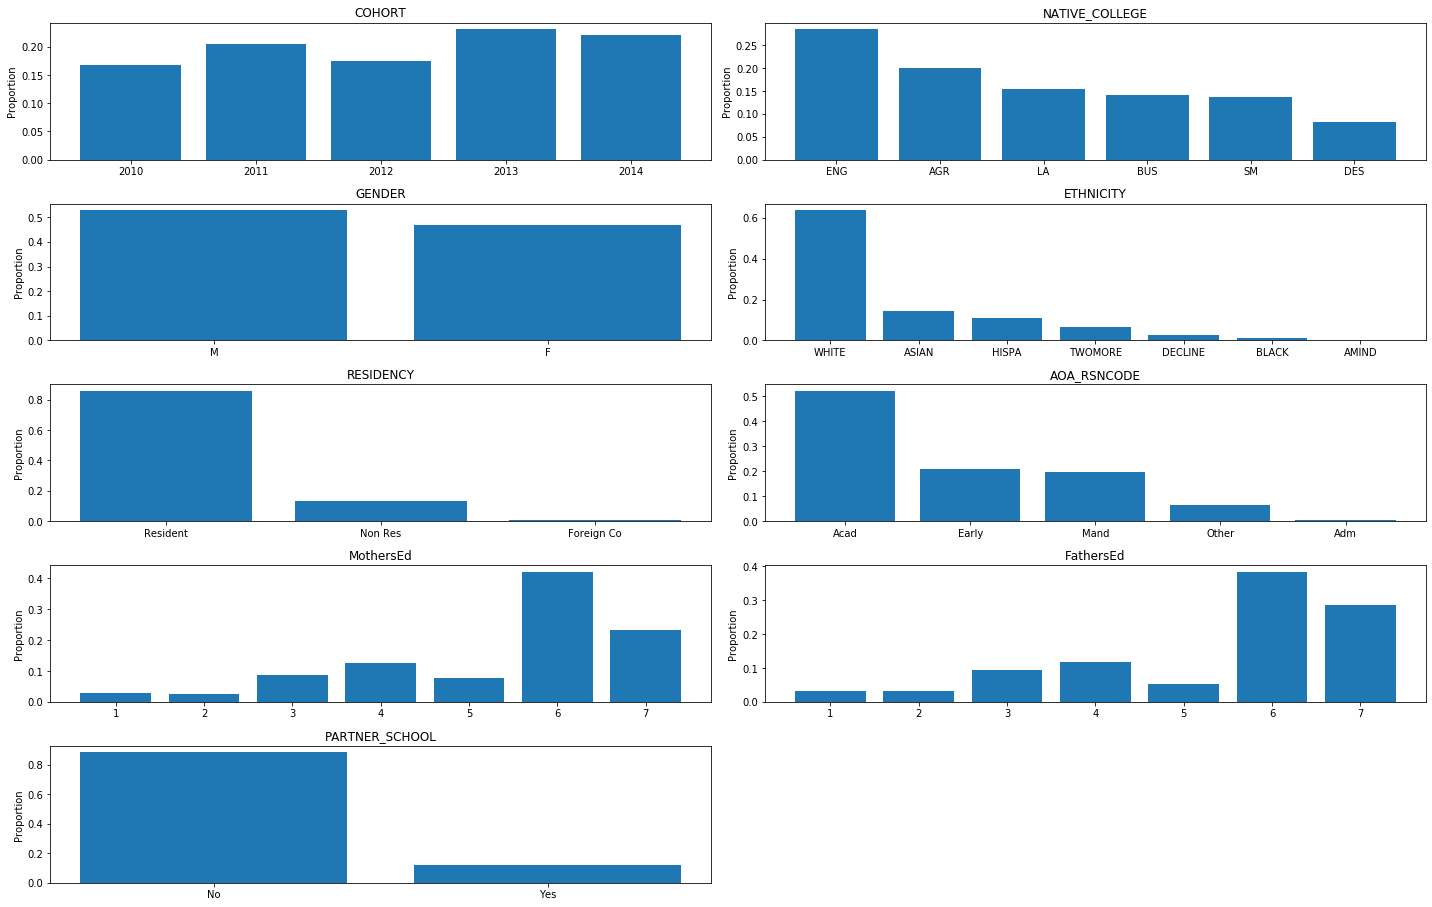

In [12]:
#name_graphs = cat_dat.columns.copy()
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize = (20,20))
for i,col in enumerate(plot_lst):
    plt.subplot(8,2,i+1)
    plt.bar(col.keys(),col.values(), align='center')
    plt.title(cat_dat.columns[i])
    plt.ylabel('Proportion')
    plt.tight_layout()

***Note: proportions are calculated by amount of non missing values for each attribute respectively.*** <br>
**Some Observations**:

   * Proportion of students from a particular year are fairly close
   * College of Engineering is the most popular college 28.5% of all students admitted.
   * There are slightly more males(.529) than females (.470).
   * The ethnicity with the highest proportion is white with 63.9%
   * 85.8% of students at this universtiy are residents of the state
   * 52.19% of students were accepted via the Academic Avenue of Admission
   * Having a 4 year graduate degree (6) is the level of education the majority of Mothers(42.10%) and Fathers have (38.49%). 
   * 88.23% percent of students are not from a partner school.

In [13]:
dfchurn.iloc[:,[7,8,9,11,12,13]].describe()

,MothersEd,FathersEd,HS_GPA,SATRead,SATMath,Churn
count,20285.000000,20103.000000,20601.000000,20931.000000,20928.000000,21026.000000
mean,5.380084,5.421280,3.841494,600.528881,635.979071,0.056834
std,1.550306,1.631192,0.447736,77.961929,75.535564,0.231531
min,1.000000,1.000000,0.000000,300.000000,340.000000,0.000000
25%,4.000000,4.000000,3.636000,550.000000,580.000000,0.000000
50%,6.000000,6.000000,3.880000,600.000000,640.000000,0.000000
75%,6.000000,7.000000,4.102000,650.000000,690.000000,0.000000
max,7.000000,7.000000,4.985000,800.000000,800.000000,1.000000


Lets look at the actual distributions

In [14]:
%%capture
fig1, ax1 = plt.subplots(figsize=(10,6))
dfchurn.iloc[:,[9,11,12]].hist(ax=ax1)
fig1.tight_layout()
plt.show()

The `HS_GPA` column has missing values and values with 0s. We will work with the assumption that 0s have some meaning and create indicator variable when we get to preparing the data for our ML classifier.

<div class="alert alert-block alert-info">
Additionally lets take notice that our data set is very highly asymmetric, with students who churned, only making up 5.68%
</div>

A classifier that predicts EVERY student does not churn has an accuracy rate of 95-96% but accuracy is not the right metric we are after and thus is not very useful.

Before we take a closer look at our data in the Exploratory Data Analysis lets sample a test set so we avoid ***data snooping*** bias

### Test Set Creation

In [15]:
churn_dat = dfchurn.drop(columns = ['Churn'])
churn_labels = dfchurn['Churn'].copy()

In [16]:
from sklearn.model_selection import train_test_split
churn_train_set,churn_test_set,churn_train_labels,churn_test_labels= train_test_split(churn_dat,churn_labels,random_state=22, train_size=0.8)

In [17]:
eda_df = churn_train_set.copy()
eda_df['Churn'] = churn_train_labels.copy()
eda_df.to_csv('eda_data.csv')

# Data Exploration
<a id='two'></a>

A record of data exploration is in the Churn_EDA.ipynb a copy of the data was used for data exploration 

# Data Preparation 
<a id='three'></a>

In [18]:
X_train = churn_train_set.copy()

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,SimpleImputer,MissingIndicator
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,QuantileTransformer
from sklearn.pipeline import FeatureUnion

In [20]:
X_train.shape

(16820, 13)

In [21]:
for col in X_train.columns:
    if X_train[col].isna().sum() >0 :
        print(X_train[col].name,'has', X_train[col].isna().sum(),'missing values')

GENDER has 3 missing values
ETHNICITY has 1 missing values
MothersEd has 607 missing values
FathersEd has 747 missing values
HS_GPA has 334 missing values
SATRead has 73 missing values
SATMath has 76 missing values


In [22]:

def prep_dat(df,ylabels=None):
    df = df.drop(columns = ['UNIQUE_ID'])
    
    i_one = df.loc[pd.isnull(df['GENDER'])].index
    i_two = df.loc[pd.isnull(df['ETHNICITY'])].index
    labels_update = list(np.append(i_one,i_two))
    print(labels_update)

    df = df.drop(labels=labels_update)
    
    df.reset_index(inplace=True,drop=True)
    #including only the values without missing gender and ethnicity
    df = df[pd.notnull(df['GENDER'])]
    df = df[pd.notnull(df['ETHNICITY'])]
    col_names = df.columns 
    df['HS_GPA'] = df['HS_GPA'].replace(0,np.nan)
    
    imputer_transformer = FeatureUnion(
    transformer_list = [
        ('features',SimpleImputer(strategy = 'constant',fill_value = 0)),
        ('indicators',MissingIndicator())])
    out_df = imputer_transformer.fit_transform(df)
    #imputed dfcreation
    col_names = np.append(col_names,['Ind_Mothers','Ind_Fathers','Ind_HS_GPA','Ind_SATRead','Ind_SATMath'])
    imputed_df = pd.DataFrame(out_df,columns = col_names)
    imputed_df[['Ind_Mothers','Ind_Fathers','Ind_HS_GPA','Ind_SATRead','Ind_SATMath']] = imputed_df[['Ind_Mothers','Ind_Fathers','Ind_HS_GPA','Ind_SATRead','Ind_SATMath']].astype(int)
    if np.any(ylabels):
        ylabels = ylabels.drop(labels=labels_update)
        ylabels.reset_index(inplace=True,drop=True)
        return imputed_df,ylabels
    else:
        return imputed_df

In [23]:
prepped = prep_dat(X_train)

[6835, 9473, 1660, 8329]


In [24]:
def transform_cat(prep_df,ylabels=None):
    #feature scaling and tranformations for categorical attributes
    col_names = prep_df.columns
    ordinal_att = ['COHORT','MothersEd','FathersEd'] 
    one_hot_att = ['NATIVE_COLLEGE','GENDER','ETHNICITY','RESIDENCY','AOA_RSNCODE','PARTNER_SCHOOL']
    num_att = ['HS_GPA','SATRead','SATMath']
    column_trans = ColumnTransformer([
      ('ordinal_cat',OrdinalEncoder(),ordinal_att),
      ('one_hot_cat',OneHotEncoder(),one_hot_att),
      ('num_att',QuantileTransformer(output_distribution='normal',random_state=22),num_att)],
        remainder = 'passthrough')
    trans_df = column_trans.fit_transform(prep_df)
    if np.any(ylabels):
        return trans_df,ylabels
    else:
        return trans_df

In [25]:
trans_dat = transform_cat(prepped)
#trans_dat[0,:]
trans_dat.shape

(16816, 36)

# Establishing our baseline costs and comparing classifiers.
<a id='four'></a>

In [26]:
#updating the train_labels as we have removed some observations above

i_one = churn_train_set.loc[pd.isnull(churn_train_set['GENDER'])].index
i_two = churn_train_set.loc[pd.isnull(churn_train_set['ETHNICITY'])].index
labels_update = list(np.append(i_one,i_two))


churn_train_set = churn_train_set.drop(labels=labels_update)
churn_train_set.reset_index(inplace=True,drop=True)
churn_train_labels = churn_train_labels.drop(labels = labels_update)
churn_train_labels.reset_index(inplace=True,drop=True)

In [27]:
from sklearn.metrics import confusion_matrix
def average_cost(y, ypred, cost):
    c=confusion_matrix(y,ypred)
    score=np.sum(c*cost)/np.sum(c)
    return score

In [28]:
cost=np.array([[tnc,fpc],[fnc, tpc]])
print (cost)

[[    0.  3400.]
 [54000. 28700.]]


### We predict no student churns and the university does nothing

If we treat our training data as our test set  look at the estimated cost per customer if we predicted no student would churn our cost per student would be:

In [29]:
actual_values = churn_train_labels.values == 1
ypred_none = np.zeros(churn_train_set.shape[0],dtype='int')
print(confusion_matrix(actual_values,ypred_none))

[[15856     0]
 [  960     0]]


In [30]:
baseline_noaction = average_cost(actual_values,ypred_none,cost)
baseline_noaction

3082.778306374881

Not doing anything cost the university \\$3082 per student

### Predict all students churn and the university pays for every students retention service

In [31]:
ypred_all = np.ones(churn_train_set.shape[0],dtype = 'int')
print(confusion_matrix(actual_values,ypred_all))

[[    0 15856]
 [    0   960]]


In [32]:
baseline_overtop = average_cost(actual_values,ypred_all,cost)
baseline_overtop

4844.3387250237865

Providing the retention service to everyone costs \\$4844 per student, not surisingly. <br>
**The first one is the one to beat!**

Before we start using machine learning classifiers its important to note how the machine learning classifiers predict a student to churn. The classifiers we will be using estimate the probability that an instance x belongs to the positive class using a decision boundary. By default the sklearn API ***predict*** assumes a threshold decision boundary probability `t` of having a +ive sample to be .5; that is, if a sample has a greater than .5 chance of being a 1,the classfier will predict that a student churns, or else it will predict that the student persist. 

However when FN are more expensive than FP, you want to lower this threshold: since you are ok with falsely classifying -ive examples as +ive. We can utilize our cost matrix as a risk matrix to provide us with a threshold `t` for our machine learning classifier. So that it may for each sample, simply predict the class that will minimize cost on our test set. 

Decision Theory Math the theory which tells us how to make a positive or negative prediction for a given sample which concludes that: 


$$t = \frac{r}{1+r}$$.

where: 

$$ r =\frac{c_{FP} - c_{TN}}{c_{FN} - c_{TP}}$$

Note that the threshold itself depends only on costs and is independent of the classifier.This threshold however is only approximate and we may be better off using a Cost curve (below) to find minimum cost.

In [33]:
def rat(cost):
    return (cost[0,1] - cost[0,0])/(cost[1,0]-cost[1,1])

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

forest_clf = RandomForestClassifier(n_estimators = 100,random_state = 22)
y_probas_forest = cross_val_predict(forest_clf,trans_dat,churn_train_labels,cv =3,method='predict_proba')

In [35]:
y_probas_forest

array([[0.96, 0.04],
       [0.8 , 0.2 ],
       [0.97, 0.03],
       ...,
       [0.93, 0.07],
       [0.95, 0.05],
       [0.84, 0.16]])

`y_probas_forest` is an array containing a row per instance and a column per class, each containing the probability that the given instance belongs to the given class (e.g second student has a 60% chance of not churning and a 40% chance of churning). Recall that when False Negatives (prediction of a student not churning when in fact they churn) are more expensive than False Positives, you want to lower the machine learning classifier threshold so that you are ok with falsely classifying -ive examples as +ive. But as we see from the average cost per student below a threshold of .118 i.e **if  a student has a greater than 11.8 % probability of churning we are going to predict that the student will churn**. Results in the average cost per student to actually increase to \\$3125 per student from us not doing anything at \\$3082. That is why we are better off using a Cost curve (below) to find the threshold.

In [36]:
r = rat(cost)
t=r/(1+r)
print(t)
p1 = y_probas_forest[:,1]
ypred = (p1>=t)*1
average_cost(actual_values,ypred,cost)

0.11846689895470382


3125.20813510942

# Cost Curve
<a id='five'></a>

In [37]:
mpl.rcParams.update(mpl.rcParamsDefault)

In [55]:
import matplotlib.cm as cm
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from PIL import Image
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])


In [84]:
from sklearn.metrics import roc_curve
def percentage(tpr, fpr, priorp, priorn):
    perc = tpr*priorp + fpr*priorn
    return perc
def av_cost2(tpr, fpr, cost, priorp, priorn):
    profit = priorp*(cost[1][1]*tpr+cost[1][0]*(1.-tpr))+priorn*(cost[0][0]*(1.-fpr) +cost[0][1]*fpr)
    return profit
def plot_cost(name, clf, ytest, xtest, cost, ax=None, threshold=False, labe=200, proba=True):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    priorp=np.mean(ytest)
    priorn=1. - priorp
    ben=[]
    percs=[]
    for i,t in enumerate(thresholds):
        perc=percentage(tpr[i], fpr[i], priorp, priorn)
        ev = av_cost2(tpr[i], fpr[i], cost, priorp, priorn)
        ben.append(ev)
        percs.append(perc*100)
    ax.plot(percs, ben, '-', alpha=0.3, markersize=5,color='k',ls='solid', label='cost curve(%s)' % name)
    if threshold:
        label_kwargs = {}
        label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
        )
        for k in range(1, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (percs[k], ben[k]), **label_kwargs)
    ax.legend(loc="lower right",prop = {'size':18})
    return ax

In [74]:
forest_clf = RandomForestClassifier(n_estimators = 100,random_state = 22)
forest_clf.fit(trans_dat,churn_train_labels)



Xtest,ytest = prep_dat(churn_test_set,churn_test_labels)
Xtest,ytest = transform_cat(Xtest,ytest)

[15942, 8161]


We calculate the expected profit per person and plot it against the percentage predicted positive by that threshold to produce a profit curve. **Thus, small percentages correspond to samples most likely to be positive: a percentage of 8% means the top 8% of our samples ranked by likelihood of being positive**

0.58
0.22
0.02


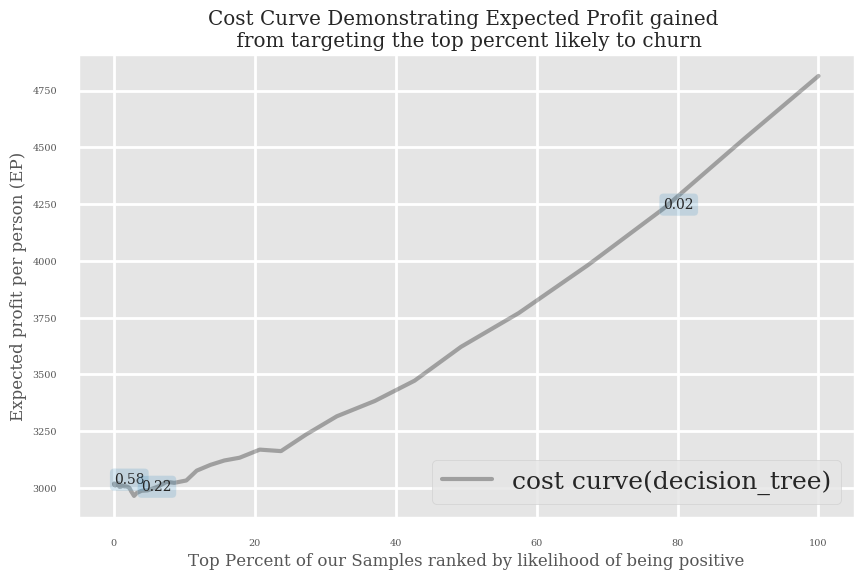

In [97]:
plt.rc('font',family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
fig = plt.figure(figsize = (10,6))
plt.style.use('ggplot')
plt.rcParams['font.size'] = 10
ax = plot_cost("decision_tree",forest_clf, ytest, Xtest, cost, threshold=True, labe=20)
ax.set_ylabel('Expected profit per person (EP)')
ax.set_xlabel('Top Percent of our Samples ranked by likelihood of being positive')
ax.set_title('Cost Curve Demonstrating Expected Profit gained \n from targeting the top percent likely to churn')
plt.show()

In [86]:
t=.2
p1 = y_probas_forest[:,1]
ypred = (p1>=t)*1
average_cost(actual_values,ypred,cost)

3065.193862987631

Using the cost curve we reduce our cost per student from 3082 to 3065 for a percent change of 55%

This university has an approximate freshman retention rate of 94.32% if it would like to beat or match UCLA which has the best retention rate in california with 97% how much would the university have to endure per student to reach that goal. Currently in our preparred training data 960 out 16816 students churned. Our machine learning classifier predicted 111 out of the 960 with a threshold of .2 and a cost per student of 3065. In order to reach a 97% retention rate our machine learning classifier would have to predict **504 out of the 960** students who churn. Below we investigate what threshold is necessary for this to happen and what our cost per student would come out to be.

In [87]:
def find_threshold():
    t= .2
    searching = False
    results = []
    while searching != True: 
        t -= .01
        p1 = y_probas_forest[:,1]
        ypred_budget = (p1>=t)*1
        new_cost = average_cost(actual_values,ypred,cost)
        d = {'Actual_values':actual_values,'Predicted_values':ypred_budget}
        budget_df = pd.DataFrame(data=d)
        increased_ret = (budget_df['Actual_values']==True) & (budget_df['Predicted_values']==1)
        predict_size = budget_df[increased_ret].shape[0]
        
        if predict_size >= 504:
            searching = True
            results.extend([new_cost,predict_size,t])
    return results

In [88]:
business_results = find_threshold()
business_results

[3065.193862987631, 516, 0.06999999999999998]

# References

* Noel, L., & Levitz, R., & Saluri, D. (Eds.) (1985). ***Increasing student retention: New challenges and potential***. San Francisco: Jossey-Bass. 
* Astin, A. W. (1975). Preventing students from dropping out. San Francisco: Jossey-Bass. 
* Hossler, D., & Bean, J. P. (1990). The strategic management of college enrollments. San
 Francisco: Jossey-Bass. 
 *http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.577.3510&rep=rep1&type=pdf